In [354]:
from enum import Enum

import pandas as pd
import numpy as np

import os
import cv2
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from PIL import Image
import gc

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [355]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [356]:
class EOutput(Enum):
  NEGATIVE = 0
  BACTERIA = 1
  VIRUS = 2

class EDataset(Enum):
  TRAIN = 0
  VALIDATION = 1
  TEST = 2

In [357]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (250,250))
            images.append(img)

            if "bacteria" in filename:
              labels.append('bacteria')
              continue
            if "virus" in filename:
              labels.append('virus')
              continue

            labels.append('negative')

    return images, labels

def setup_images_from_path(path):
  images, labels = load_images_from_folder(path)

  image_arrays = np.array(images)

  return list(zip(labels, image_arrays))

In [360]:
prefix = '/Users/danyleguy/Documents/Travail/EPITECH/MSc1/6.Zoidberg/dataset/better_repartition'

train_path = f'{prefix}/train'
validation_path = f'{prefix}/val'
test_path = f'{prefix}/test'


In [361]:
train_ds = setup_images_from_path(train_path)
val_ds = setup_images_from_path(validation_path)
test_ds = setup_images_from_path(test_path)

In [362]:
print(f"Train dataset size: {len(train_ds)}")
print(f"Validation dataset size: {len(val_ds)}")
print(f"Test dataset size: {len(test_ds)}")

Train dataset size: 4684
Validation dataset size: 586
Test dataset size: 585


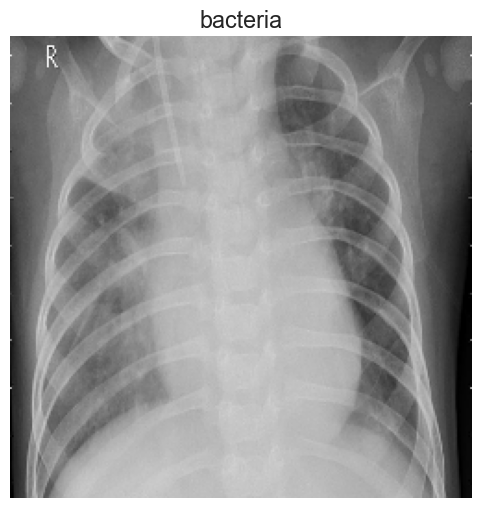

In [367]:
label, image = train_ds[np.random.randint(0, len(train_ds))]

plt.imshow(image)
plt.title(label)
plt.axis('off')

plt.show()

In [368]:
labels = [item[0] for item in train_ds]
images = [item[1] for item in train_ds]

images_flattened = [image.flatten() for image in images]

In [369]:
model = LogisticRegression(multi_class='multinomial', solver='sag')


In [370]:
model = model.fit(images_flattened, labels)

/Users/danyleguy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [373]:
test_labels = [item[0] for item in test_ds]
test_images_flatten = [item[1].flatten() for item in test_ds]

predictions = model.predict(test_images_flatten)
print(f"Train accuracy: {accuracy_score(test_labels, predictions)}")

Train accuracy: 0.770940170940171


Predicted: ['virus']


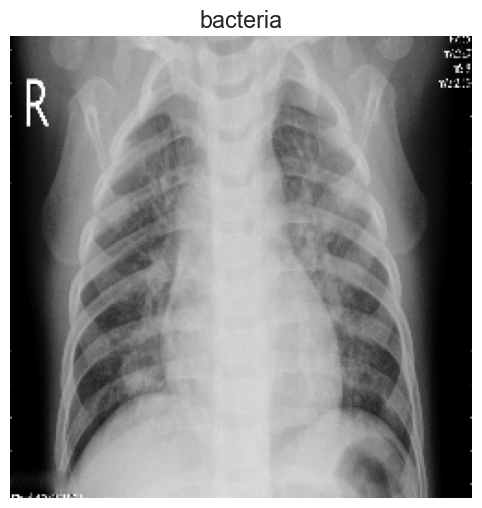

In [390]:
label, image = train_ds[np.random.randint(0, len(test_ds))]

plt.imshow(image)
plt.title(label)
print(f"Predicted: {model.predict([image.flatten()])}")

plt.axis('off')

plt.show()

In [ ]:
from enum import Enum


class EOutput(Enum):
  NEGATIVE = 0
  BACTERIA = 1
  VIRUS = 2

  

In [ ]:
print(EOutput.NEGATIVE.value)

0


In [ ]:
EOutput(1).name


'BACTERIA'